# ონლაინ მაღაზიის მომხმარებლების სეგმენტაცია

## იმპორტები

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

## მონაცემების ჩატვირთვა


In [37]:
file_name = 'clustering_მონაცემები.xlsx'

try:
    df = pd.read_excel(file_name)
    print("ფაილი წარმატებით ჩაიტვირთა.")
    display(df.head())
except FileNotFoundError:
    print(f"შეცდომა: ფაილი '{file_name}' ვერ მოიძებნა.")
    print("დარწმუნდით, რომ ფაილი კოდის გვერდით დევს.")
except Exception as e:
    print(f"შეცდომა: {e}")
    print("თუ წერს 'missing optional dependency openpyxl', გაუშვით ცალკე სელში: !pip install openpyxl")

ფაილი წარმატებით ჩაიტვირთა.


,ID,ასაკი,შესყიდვების_რაოდენობა,საშუალო_ჩეკი(₾),საიტზე_დახარჯული_დრო(წთ),დაბრუნების_სიხშირე(%)
0,1,25,15,120,25,5
1,2,45,8,450,15,2
2,3,32,22,85,35,8
3,4,28,18,95,30,6
4,5,52,5,520,10,1


## მონაცემების მომზადება

In [38]:
if 'ID' in df.columns:
    data = df.drop('ID', axis=1)
else:
    data = df.copy()

# ნორმალიზაცია
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# შენახვა DataFrame-ში
df_scaled = pd.DataFrame(data_scaled, columns=data.columns)
print("მონაცემები ნორმალიზებულია.")

მონაცემები ნორმალიზებულია.


## elbow method

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

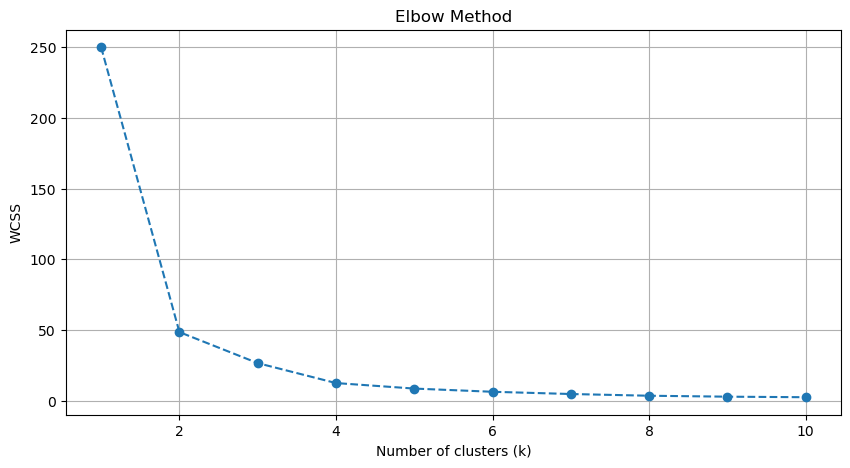

In [40]:
wcss = []
k_range = range(1, 11)

for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

## კლასტერინგი და 3D ვიზუალიზაცია (PCA)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


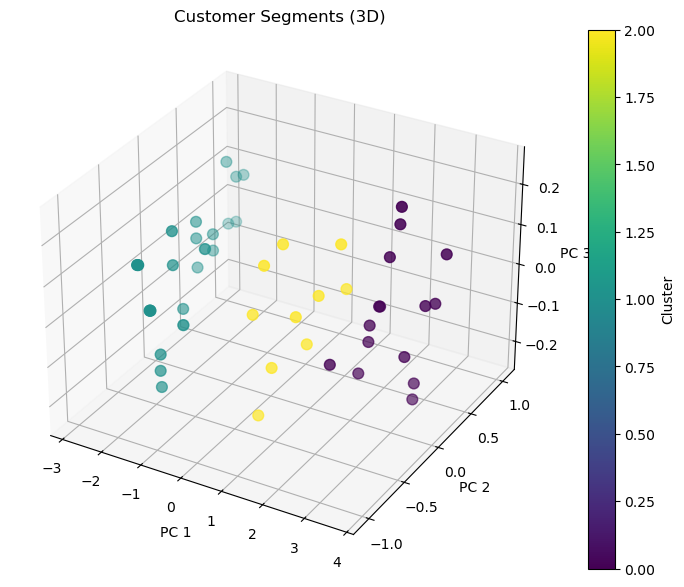

In [42]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled)

df['Cluster'] = clusters

pca = PCA(n_components=3)
components = pca.fit_transform(data_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(components[:, 0], components[:, 1], components[:, 2], 
                     c=df['Cluster'], cmap='viridis', s=60)

ax.set_title('Customer Segments (3D)')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.colorbar(scatter, label='Cluster')
plt.show()

## შედეგების ანალიზი და ინტერპრეტაცია

Silhouette Score: 0.611

კლასტერების მახასიათებლები:


,ასაკი,შესყიდვების_რაოდენობა,საშუალო_ჩეკი(₾),საიტზე_დახარჯული_დრო(წთ),დაბრუნების_სიხშირე(%)
Cluster,,,,,
0,47.666667,6.866667,478.00,12.133333,1.60
1,28.480000,18.080000,99.12,29.600000,6.36
2,37.900000,11.000000,334.50,18.500000,3.30


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8382 (\N{LARI SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8382 (\N{LARI SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


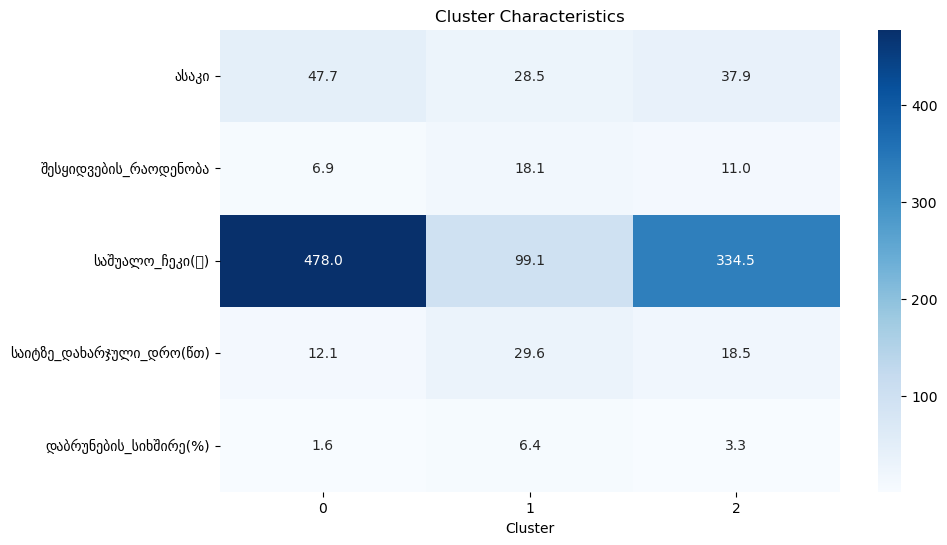

In [43]:
# Silhouette Score
score = silhouette_score(data_scaled, clusters)
print(f"Silhouette Score: {score:.3f}")


cols = [c for c in df.columns if c != 'ID' and c != 'Cluster']
cluster_summary = df.groupby('Cluster')[cols].mean()

print("\nკლასტერების მახასიათებლები:")
display(cluster_summary)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary.T, annot=True, cmap="Blues", fmt='.1f')
plt.title('Cluster Characteristics')
plt.show()